# Preparing the dataset

In [198]:
# Loading Python libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

In [199]:
# Loading data
df = pd.read_csv('train.csv')

# 30% sample of items used initially 
df = df.sample(frac=0.09)
print(df)

                                                 msno  ... target
1858895  BCFBeNgqfmrkB/aldv4158KSylOucH7qshgcNmskRWI=  ...    1.0
2156590  c4mIhY3dmtonwWACLcIK4GVTywK0A5Xn7Qt6JMsrpdI=  ...    1.0
1313598  HDLGPHJq+BFb1mhDdZwhFqz669l6rKAj77NZyruX4GY=  ...    1.0
612610   1Ik8ihgm4qVc1wBb+R267O96zNDdLJcgccjmtwkU2H4=  ...    0.0
1070295  TewRQYat/+bq28HxYLHTcGWgqXpPsW+9pwBmS+WL0F0=  ...    0.0
...                                               ...  ...    ...
301650   fg1w6/8iqYE0wNR5PuqkXbCkfShG/JgL7whHhA8eraY=  ...    0.0
1014376  IFESfvO8k77RzKqhPy4WTll9x5O6RhQymjiOCkV1YGE=  ...    1.0
192417   WkpCEIs/WRM4zKjbOmihnvBbxZPdRoxvhwQ+uXSkkAw=  ...    1.0
1094210  eTuDxlwU+bzG5onQLoUVmFFPDrFQ14pDuZvEaghNNfo=  ...    1.0
2524761  J7Y58FSoKiAOHVWztqqG4U7AinzcRFQNXADL0SEhNMo=  ...    0.0

[229750 rows x 6 columns]


In [200]:
# Loading and join wuth the songs data
songs = pd.read_csv('songs.csv')
df = pd.merge(df, songs, on='song_id', how='left')
del songs

# Loading and join members data
members = pd.read_csv('members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members
print(df)

                                                msno  ... expiration_date
0       BCFBeNgqfmrkB/aldv4158KSylOucH7qshgcNmskRWI=  ...        20170923
1       c4mIhY3dmtonwWACLcIK4GVTywK0A5Xn7Qt6JMsrpdI=  ...        20180417
2       HDLGPHJq+BFb1mhDdZwhFqz669l6rKAj77NZyruX4GY=  ...        20170913
3       1Ik8ihgm4qVc1wBb+R267O96zNDdLJcgccjmtwkU2H4=  ...        20180806
4       TewRQYat/+bq28HxYLHTcGWgqXpPsW+9pwBmS+WL0F0=  ...        20180201
...                                              ...  ...             ...
229745  fg1w6/8iqYE0wNR5PuqkXbCkfShG/JgL7whHhA8eraY=  ...        20170930
229746  IFESfvO8k77RzKqhPy4WTll9x5O6RhQymjiOCkV1YGE=  ...        20170930
229747  WkpCEIs/WRM4zKjbOmihnvBbxZPdRoxvhwQ+uXSkkAw=  ...        20170610
229748  eTuDxlwU+bzG5onQLoUVmFFPDrFQ14pDuZvEaghNNfo=  ...        20170916
229749  J7Y58FSoKiAOHVWztqqG4U7AinzcRFQNXADL0SEhNMo=  ...        20170930

[229750 rows x 18 columns]


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229750 entries, 0 to 229749
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    229750 non-null  object 
 1   song_id                 229750 non-null  object 
 2   source_system_tab       228894 non-null  object 
 3   source_screen_name      218503 non-null  object 
 4   source_type             229023 non-null  object 
 5   target                  229750 non-null  float64
 6   song_length             229747 non-null  float64
 7   genre_ids               226391 non-null  object 
 8   artist_name             229747 non-null  object 
 9   composer                179423 non-null  object 
 10  lyricist                133451 non-null  object 
 11  language                229743 non-null  float64
 12  city                    229750 non-null  int64  
 13  bd                      229750 non-null  int64  
 14  gender              

In [202]:
# Counting null values in %
df.isnull().sum()/df.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.372579
source_screen_name         4.895321
source_type                0.316431
target                     0.000000
song_length                0.001306
genre_ids                  1.462024
artist_name                0.001306
composer                  21.905114
lyricist                  41.914690
language                   0.003047
city                       0.000000
bd                         0.000000
gender                    39.126007
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [203]:
# Replacing the values of null by unkown
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)
# Again checking for null values
print(df.isnull().sum()/df.isnull().count()*100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


msno                      0.0
song_id                   0.0
source_system_tab         0.0
source_screen_name        0.0
source_type               0.0
target                    0.0
song_length               0.0
genre_ids                 0.0
artist_name               0.0
composer                  0.0
lyricist                  0.0
language                  0.0
city                      0.0
bd                        0.0
gender                    0.0
registered_via            0.0
registration_init_time    0.0
expiration_date           0.0
dtype: float64


In [204]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,BCFBeNgqfmrkB/aldv4158KSylOucH7qshgcNmskRWI=,Z0wf/1MUUfujEmnzNmkxAMFXOQsT1koAO1xgDYjLd5s=,my library,Artist more,top-hits-for-artist,1.0,232942.0,465,Jason Chen,unknown,unknown,52.0,6,24,male,3,20130113,20170923
1,c4mIhY3dmtonwWACLcIK4GVTywK0A5Xn7Qt6JMsrpdI=,UGp34rMncOPbuWO1T1FJvEf1pdLTGpAwW34lm4fhCNk=,my library,Local playlist more,local-library,1.0,282017.0,465,AKB48,井上 ヨシマサ,秋元 康,17.0,1,0,unknown,4,20160611,20180417
2,HDLGPHJq+BFb1mhDdZwhFqz669l6rKAj77NZyruX4GY=,BVne9E4h0yAAcXWXY48PNoakvvDQaYIcXvobLW0apOU=,my library,Local playlist more,local-library,1.0,245864.0,465,家家 (JiaJia),謝廣太,廖瑩如,3.0,13,0,unknown,4,20151012,20170913
3,1Ik8ihgm4qVc1wBb+R267O96zNDdLJcgccjmtwkU2H4=,Tx03INE7jKUjUxYCLsUDLYDBUea7pGt/3e+S1y7oJ3M=,my library,Local playlist more,local-library,0.0,296542.0,458,梁靜茹 (Fish Leong),Xue Bin Peng,unknown,3.0,13,43,male,3,20131126,20180806
4,TewRQYat/+bq28HxYLHTcGWgqXpPsW+9pwBmS+WL0F0=,WznMG5LmzE4k7q1OQLPAV2s96k8ZIrVvG/rihErlYWk=,my library,Local playlist more,local-library,0.0,252656.0,465,朱俐靜 (Miu Chu),朱俐靜+陳勢安,天樂,3.0,21,20,male,9,20151030,20180201


In [205]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

<Figure size 720x720 with 0 Axes>

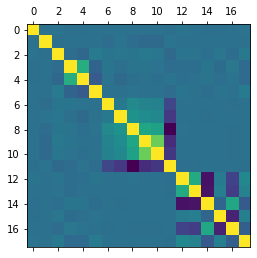

In [206]:
# plotting Сorrelation matrix
plt.figure(figsize=[10,10])
plt.matshow(df.corr())
plt.show()

In [207]:
# Droping columns date and time
df = df.drop(['expiration_date', 'registration_init_time'], 1)
# separating target from dataframe
target = df.pop('target')
print(df.head())
print(target)

    msno  song_id  source_system_tab  ...  bd  gender  registered_via
0   3833    30067                  3  ...  24       1               3
1  11912    26280                  3  ...   0       2               4
2   5604    11037                  3  ...   0       2               4
3    944    26022                  3  ...  43       1               3
4   9264    28382                  3  ...  20       1               9

[5 rows x 15 columns]
0         1.0
1         1.0
2         1.0
3         0.0
4         0.0
         ... 
229745    0.0
229746    1.0
229747    1.0
229748    1.0
229749    0.0
Name: target, Length: 229750, dtype: float64


In [208]:
# Train & Test split done using 70 to 30 ratio
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.3)
test_l = list(test_labels)
print("Training data-----------------------")
print("Training data shape = ",train_data.shape)
print("Testing data------------------------")
print("Testing data shape = ",test_data.shape)

Training data-----------------------
Training data shape =  (160825, 15)
Testing data------------------------
Testing data shape =  (68925, 15)


# Using XGBoost for classification

In [209]:
# defining the functions for model parameters generation
from random import randint
# defining a function that generates the parameters randomly
def model_parameters_random(LearningRate,MaxDepth,MinChildWeight,Estimators):
  m = []
  for i in range(5):
    a = randint(0,len(LearningRate)-1)
    b = randint(0,len(MaxDepth)-1)
    c = randint(0,len(MinChildWeight)-1)
    d = randint(0,len(Estimators)-1) 
    l = []
    l.append(LearningRate[a])
    l.append(MaxDepth[b])
    l.append(MinChildWeight[c])
    l.append(Estimators[d])
    m.append(l)
  return m
# selecting a model from randomly generated models using the test accuracy of model as selection criteria
def model_Selection(model_parms):
  s = [] 
  for i in range(len(model_parms)):
    l = model_parms[i]
    print("Training model with parameters:----------------------------\n",l)
    model = xgb.XGBClassifier(learning_rate=l[0], max_depth=l[1], min_child_weight=l[2], n_estimators=l[3])
    model.fit(train_data, train_labels)
    test_p = model.predict(test_data)
    accuracy = model_accuracy(test_l,test_p)
    print("Accuracy on test data is:----------------------------------\n",accuracy)
    s.append(accuracy)
  max = 0
  index = 0
  for i in range(len(s)):
    if (accuracy*100>max):
      max=accuracy*100
      index = i
  return model_parms[i]

# defining the function that calculates the accuracy of model
def model_accuracy(y,t):
  c = 0
  for i in range(len(y)):
    if y[i]==t[i]:
      c = c + 1
  return (c/len(y))

In [210]:
# Create model and model selection strategy
# creating a small sample space
l_r = [0.1,0.01]
m_d = [25,30,35,40]
m_c_w = [5,10,20]
n_e = [250,300,150]
# generating the models using random parameters
model_parms = model_parameters_random(l_r,m_d,m_c_w,n_e)
print(model_parms)
# selecting the best model
model_parms_predicted = model_Selection(model_parms)
print(model_parms_predicted)

[[0.01, 35, 20, 150], [0.01, 25, 20, 150], [0.01, 35, 20, 150], [0.1, 30, 5, 250], [0.01, 35, 10, 150]]
Training model with parameters:----------------------------
 [0.01, 35, 20, 150]
Accuracy on test data is:----------------------------------
 0.7020239390642002
Training model with parameters:----------------------------
 [0.01, 25, 20, 150]
Accuracy on test data is:----------------------------------
 0.7016031918752267
Training model with parameters:----------------------------
 [0.01, 35, 20, 150]
Accuracy on test data is:----------------------------------
 0.7020239390642002
Training model with parameters:----------------------------
 [0.1, 30, 5, 250]
Accuracy on test data is:----------------------------------
 0.7056945955749002
Training model with parameters:----------------------------
 [0.01, 35, 10, 150]
Accuracy on test data is:----------------------------------
 0.7027493652520856
[0.01, 35, 10, 150]


In [211]:
# finally using the best model for task
p = model_parms_predicted
final_model = xgb.XGBClassifier(learning_rate=p[0], max_depth=p[1], min_child_weight=p[2], n_estimators=p[3])
final_model.fit(train_data, train_labels)

XGBClassifier(learning_rate=0.01, max_depth=35, min_child_weight=10,
              n_estimators=150)

In [212]:
# Predicting the target values for test and trainng data
predict_labels_train = final_model.predict(train_data) 
predict_labels = final_model.predict(test_data)

In [213]:
# providing a classification report for training and test data
print("For Training data--------------------------------------\n")
print(classification_report(train_labels,predict_labels_train))
print("For Testing data---------------------------------------\n")
print(classification_report(test_labels,predict_labels))

For Training data--------------------------------------

              precision    recall  f1-score   support

         0.0       0.77      0.55      0.64     60612
         1.0       0.77      0.90      0.83    100213

    accuracy                           0.77    160825
   macro avg       0.77      0.73      0.74    160825
weighted avg       0.77      0.77      0.76    160825

For Testing data---------------------------------------

              precision    recall  f1-score   support

         0.0       0.65      0.47      0.55     26053
         1.0       0.72      0.84      0.78     42872

    accuracy                           0.70     68925
   macro avg       0.69      0.66      0.66     68925
weighted avg       0.69      0.70      0.69     68925



# Using Random Forest Classifier for comparision with XGBoost

In [214]:
# creating a random forst classifier 
R_model = RandomForestClassifier(n_estimators=100, max_depth=5)

In [215]:
# fitting the model
R_model.fit(train_data,train_labels)

RandomForestClassifier(max_depth=5)

In [216]:
# predicting the values
importance = R_model.feature_importances_ 
predicted_values = R_model.predict(test_data)
#print(predicted_values)
#print(model.feature_importances_)

In [217]:
# checking for accuracy and classification report
print("For Testing data accuracy--------------------------------------\n")
print(model_accuracy(predicted_values,test_l),'\n')
print("For Testing data-----------------------------------------------\n")
print(classification_report(test_labels,predicted_values))

For Testing data accuracy--------------------------------------

0.682727602466449 

For Testing data-----------------------------------------------

              precision    recall  f1-score   support

         0.0       0.60      0.49      0.54     26053
         1.0       0.72      0.80      0.76     42872

    accuracy                           0.68     68925
   macro avg       0.66      0.64      0.65     68925
weighted avg       0.67      0.68      0.67     68925

